In [1]:
import pandas as pd
import numpy as np
import scipy.io
import statsmodels.api as sm

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.colors as colors

C:\Users\irmew01\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\irmew01\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [12]:
df = pd.read_csv("./output/ek-us-cross-section-45.csv")

In [13]:
df.head()

,income,assets,homeshare,expenditure,x1,x2,x3,x4,x5,x6,...,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
0,1.760867,1.045455,0.840006,0.963699,-7.047540,-7.791380,-9.113889,-5.269668,-8.201201,-7.455339,...,-6.165836,-5.132952,-8.409424,-7.774844,-7.887087,-8.087949,-6.989194,-7.132476,-6.084850,-0.453654
1,1.500263,0.787879,0.853103,0.920139,-7.209518,-7.976886,-9.386429,-5.388702,-8.406860,-7.630972,...,-6.304363,-5.250643,-8.621820,-7.959853,-8.146772,-8.289997,-7.149621,-7.358261,-6.222063,-0.425583
2,1.239658,0.530303,0.866861,0.873703,-7.490273,-8.303561,-9.673074,-5.591118,-8.679172,-7.864783,...,-6.523320,-5.398719,-8.904223,-8.285660,-8.407232,-8.556935,-7.427798,-7.581337,-6.377669,-0.399445
3,0.808028,0.358586,0.893349,0.787146,-7.964403,-8.868933,-10.556230,-5.902957,-9.288610,-8.375576,...,-6.864982,-5.764115,-9.541075,-8.848988,-8.984544,-9.151793,-7.896111,-8.064113,-6.776820,-0.342370
4,0.718449,0.015152,0.898870,0.766774,-8.111101,-8.944972,-10.712090,-5.986096,-9.592099,-8.534473,...,-7.054098,-5.845596,-9.866461,-8.924675,-9.062627,-9.232850,-8.040873,-8.213689,-6.962871,-0.329839


In [14]:
poor = df.expenditure < df.expenditure.quantile(0.25)

rich = df.expenditure > df.expenditure.quantile(0.75)

In [15]:
print("Rich Home Share: ", round(1 - df.homeshare[rich].median(), 3))

print("Poor Home Share: ", round(1 - df.homeshare[poor].median(), 3))

print("Rich Elasticity: ", round(df.x2[rich].median(), 3))

print("Poor Elasticity: ", round(df.x2[poor].median(), 3))

Rich Home Share:  0.076
Poor Home Share:  0.038
Rich Elasticity:  -6.214
Poor Elasticity:  -13.069


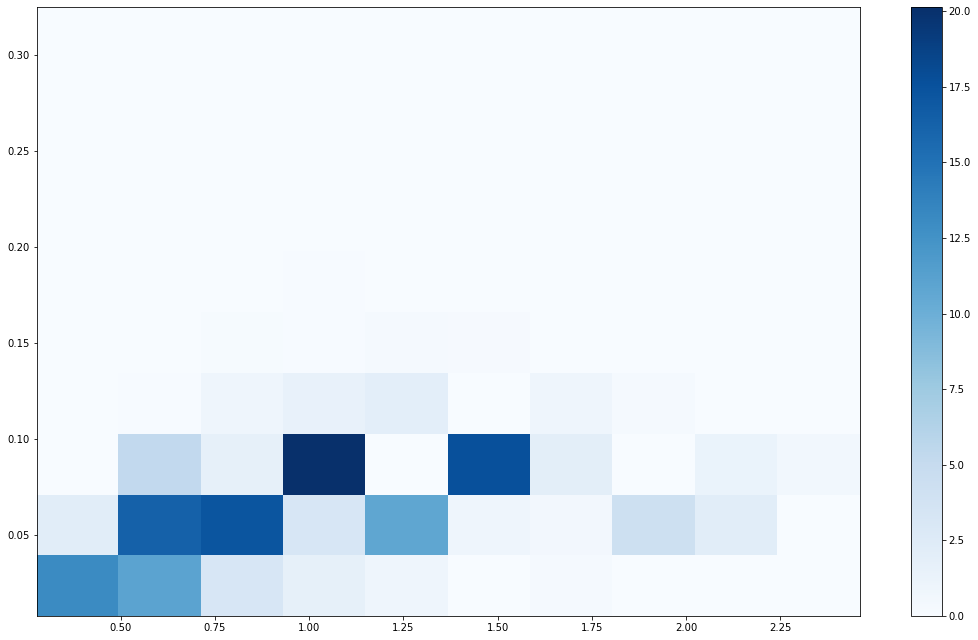

In [7]:
fig, ax = plt.subplots(figsize = [15.0,9.0], tight_layout = True)

h = ax.hist2d(df.expenditure, (1 - df.homeshare), bins=10, cmap='Blues', density = True)

fig.colorbar(h[3], ax=ax)

# ax.set_ylim(0.045,0.20)
# ax.set_xlim(0.35,2.0)

plt.show()

In [16]:
#define response variable
y = (1 - df.homeshare)

#define predictor variables
x = df.expenditure

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              homeshare   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1774.
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:57:52   Log-Likelihood:             2.3031e+05
No. Observations:              100000   AIC:                        -4.606e+05
Df Residuals:                   99998   BIC:                        -4.606e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0449      0.000    236.251      

C:\Users\irmew01\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


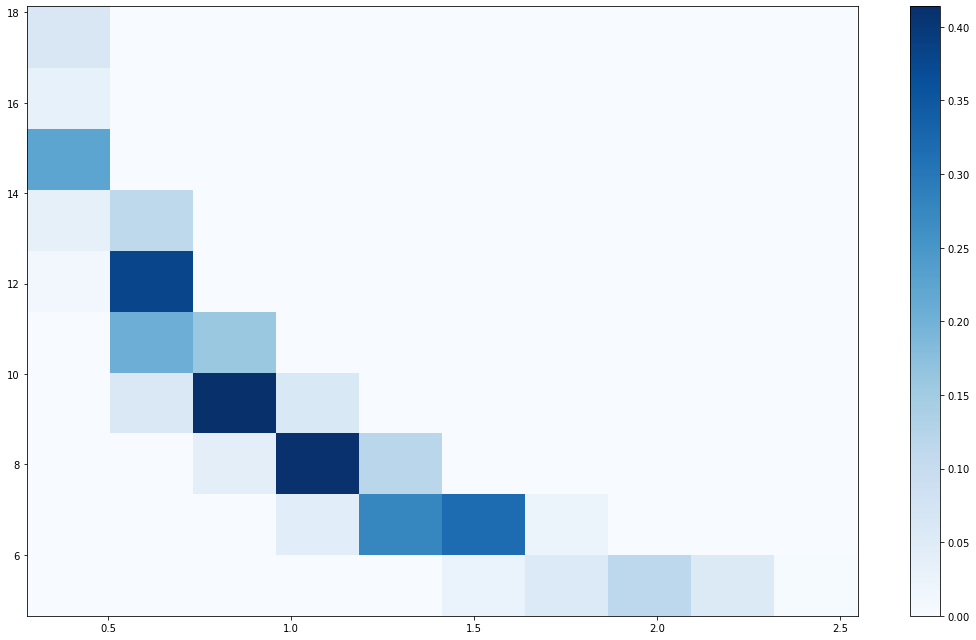

In [17]:
fig, ax = plt.subplots(figsize = [15.0,9.0], tight_layout = True)

h = ax.hist2d(df.expenditure, (- df.x2), bins=10, cmap='Blues', density = True)

fig.colorbar(h[3], ax=ax)

plt.show()